In [582]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/kuhf-dmet/nio-afm --filename=out.log --output=../data/nio-afm-kuhf-dmet.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/kuhf-dmet/nio-fm --filename=out.log --output=../data/nio-fm-kuhf-dmet.json

In [583]:
import os, sys, json
import pandas as pd

def load_data(f):
    # Load the JSON data as a dictionary first
    with open(f, 'r') as file:
        data = json.load(file)
    
    # Convert the nested dictionary to a list of records
    records = []
    for path, params in data.items():
        # Add the path as a field and merge with params
        record = {'path': path, **params}
        records.append(record)
    
    # Create DataFrame from records
    return pd.DataFrame(records)

data_nio_afm_kuhf_dmet = load_data("../data/nio-afm-kuhf-dmet.json")
# print(data_nio_afm_kuhf_dmet)

data_nio_fm_kuhf_dmet = load_data("../data/nio-fm-kuhf-dmet.json")
print(data_nio_fm_kuhf_dmet)


                                                 path          method  \
0   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
1   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...         gdf-2.0   
2   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
3   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
4   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...         gdf-2.0   
5   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
6   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
7   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...         gdf-2.0   
8   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
9   /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...         gdf-2.0   
10  /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...  fftisdf-180-25   
11  /Users/yangjunjie/work/fftisdf-for-dmet/fftisd...         gdf-2.0   
12  /Users/yangjunjie/work/fftisdf-for-dmet/fftisd.

In [584]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{color}\usepackage{colortbl}"

from pathlib import Path

figpath = Path("/Users/yangjunjie/Desktop/fftisdf-embedding/fig/")
assert figpath.exists()

from matplotlib.colors import TABLEAU_COLORS
colors = list(TABLEAU_COLORS)

markersize = 4
s = (markersize / 2) ** 2 * 3.14


[  2.   4.   8.  12.  18.  27.  36.  48.  64.  96. 125. 144. 216.]
[-366.83844213 -366.83092861 -366.78244036 -366.7814529  -366.77733966
 -366.76872225 -366.76640215 -366.7643945  -366.76244573 -366.76026835
           nan -366.75900792 -366.75783263]


/var/folders/sm/7t_ndz1j5n5dlj8m6tnm2h480000gn/T/ipykernel_23915/828510690.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.sort_values(by='nkpt', inplace=True)


ValueError: Axis limits cannot be NaN or Inf

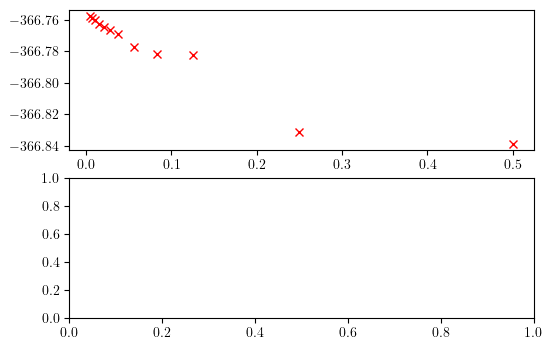

In [585]:
fig, axs = plt.subplots(2, 1, figsize=(6, 4), sharex=False)

method = ['fftisdf-180-25']

ax = axs[0]
for mi, mm in enumerate(method):
    m = method[0]
    d = data_nio_afm_kuhf_dmet[data_nio_afm_kuhf_dmet['method'] == mm]
    d.sort_values(by='nkpt', inplace=True)

    x0 = d['nkpt'].values
    y0 = d['ene_kuhf'].values

    print(x0)
    print(y0)

    colors[mi] = "red"
    ax.plot(1 / x0, y0, marker='x', linestyle='', label="AFM", color=colors[mi])

    import numpy as np
    x = (1 / x0)[-3:]
    y = y0[-3:]

    r = np.polyfit(x, y, 1)
    p = np.poly1d(r)
    x = np.linspace(0, 0.06, 100)
    y = p(x)
    
    ax.plot(x, y, marker='', linestyle='-', color=colors[mi], alpha=0.5)
    ax.set_ylim(r[1] - 0.02, r[1] + 0.02)

    out1 = {xx: yy for xx, yy in zip(x0, y0)}
    out1["TDL"] = r[1]
    # print("%20s, ene_kuhf = %f" % (mm, r[1]))

    d = data_nio_fm_kuhf_dmet[data_nio_fm_kuhf_dmet['method'] == mm]
    d.sort_values(by='nkpt', inplace=True)

    x0 = d['nkpt'].values
    y0 = d['ene_kuhf'].values

    colors[mi] = "blue"
    ax.plot(1 / x0, y0, marker='x', linestyle='', label="FM", color=colors[mi])

    import numpy as np
    x = (1 / x0)[-3:]
    y = y0[-3:]

    r = np.polyfit(x, y, 1)
    p = np.poly1d(r)
    x = np.linspace(0, 0.06, 100)
    y = p(x)
    ax.plot(x, y, marker='', linestyle='-', color=colors[mi], alpha=0.5)

    ymin = r[1] - 0.02; ymax = r[1] + 0.02
    ax.set_ylim(ymin, ymax)
    import numpy
    yy = numpy.linspace(ymin, ymax, 6)
    ax.set_yticks(yy)
    ax.set_yticklabels(["%.3f" % y for y in yy])

    # print("%20s, ene_kuhf = %f" % (mm, r[1]))
    out2 = {xx: yy for xx, yy in zip(x0, y0)}
    out2["TDL"] = r[1]

    for k in x0:
        assert out1.get(k, None) is not None
        assert out2.get(k, None) is not None
        print("nk = %3d, ene_kuhf_afm = %12.6f, ene_kuhf_fm = %12.6f, gap = % 6.4e" % (k, out1[k], out2[k], out1[k] - out2[k]))
    print("%8s, ene_kuhf_afm = %12.6f, ene_kuhf_fm = %12.6f, gap = % 6.4e" % ("TDL", out1["TDL"], out2["TDL"], out1["TDL"] - out2["TDL"]))

ax.legend(loc='upper left', bbox_to_anchor=(0.8, 1))
ax.set_xlim(0, 0.06)
ax.set_ylabel(r"$E_{\mathrm{KUHF}}$")
ax.text(0.01, 0.95, r"NiO with AFM cell", transform=ax.transAxes, fontsize=12, verticalalignment='top')

ax = axs[1]
method = ['fftisdf-180-25']

for mi, mm in enumerate(method):
    m = method[0]
    d = data_nio_afm_kuhf_dmet[data_nio_afm_kuhf_dmet['method'] == mm]
    d.dropna(subset=['ene_dmet'], inplace=True)
    d.sort_values(by='nkpt', inplace=True)

    x0 = d['nkpt'].values
    y0 = d['ene_dmet'].values - d['ene_kuhf'].values

    colors[mi] = "red"
    ax.plot(1 / numpy.power(x0, 1 / 3), y0, marker='x', linestyle='', label=m, color=colors[mi])

    import numpy as np
    xy = [(x, y) for (x, y) in zip(x0, y0)]
    #  if int(x) in [8, 27, 64, 125, 216]]
    x = numpy.array([x for x, y in xy])
    y = numpy.array([y for x, y in xy])
    x = 1 / numpy.power(x, 1 / 3)

    # ax.plot(x, y, marker='o', linestyle='', color=colors[mi], alpha=1)

    x = x[[-1, -2, -3]]
    y = y[[-1, -2, -3]]
    r = np.polyfit(x, y, 1)
    p = np.poly1d(r)
    x = np.linspace(0, max(x0), 100)
    y = p(x)
    ax.plot(x, y, marker='', linestyle='-', color=colors[mi], alpha=0.5)
    # ax.set_ylim(r[1] - 0.02, r[1] + 0.02)

    ymin = r[1] - 0.01; ymax = r[1] + 0.01
    # ax.set_ylim(ymin, ymax + 0.00)
    import numpy
    yy = numpy.linspace(ymin, ymax, 6)
    ax.set_yticks(yy)
    ax.set_yticklabels(["%.3f" % y for y in yy])

    out1 = {xx: yy for xx, yy in zip(x0, y0)}
    out1["TDL"] = r[1]
    # print("%20s, ene_kuhf = %f" % (mm, r[1]))

    colors[mi] = "blue"
    d = data_nio_fm_kuhf_dmet[data_nio_fm_kuhf_dmet['method'] == mm]
    d.dropna(subset=['ene_dmet'], inplace=True)
    d.sort_values(by='nkpt', inplace=True)

    x0 = d['nkpt'].values
    y0 = d['ene_dmet'].values - d['ene_kuhf'].values

    ax.plot(1 / numpy.power(x0, 1 / 3), y0, marker='x', linestyle='', label=m, color=colors[mi])

    import numpy as np
    # x = (1 / x0)[-3:]
    # y = y0[-3:]
    xy = [(x, y) for (x, y) in zip(x0, y0)]
    #  if int(x) in [8, 27, 64, 125, 216]]
    x = numpy.array([x for x, y in xy])
    y = numpy.array([y for x, y in xy])
    x = numpy.power(x, -1 / 3)
    # ax.plot(x, y, marker='o', linestyle='', color=colors[mi], alpha=1)

    x = x[[-1, -2, -3]]
    y = y[[-1, -2, -3]]
    r = np.polyfit(x, y, 1)
    p = np.poly1d(r)
    x = np.linspace(0, max(x0), 100)
    y = p(x)
    ax.plot(x, y, marker='', linestyle='-', color=colors[mi], alpha=0.5)

    ymin = r[1] - 0.0; ymax = r[1] + 0.04
    ax.set_ylim(ymin, ymax + 0.005)
    import numpy
    yy = numpy.linspace(ymin, ymax, 6)
    ax.set_yticks(yy)
    ax.set_yticklabels(["%.3f" % y for y in yy])

    # print("%20s, ene_kuhf = %f" % (mm, r[1]))
    out2 = {xx: yy for xx, yy in zip(x0, y0)}
    out2["TDL"] = r[1]

    for k in x0:
        assert out1.get(k, None) is not None
        assert out2.get(k, None) is not None
        print("nk = %3d, ene_dmet_afm = %12.6f, ene_dmet_fm = %12.6f, gap = % 6.4e" % (k, out1[k], out2[k], out1[k] - out2[k]))
    print("%8s, ene_dmet_afm = %12.6f, ene_dmet_fm = %12.6f, gap = % 6.4e" % ("TDL", out1["TDL"], out2["TDL"], out1["TDL"] - out2["TDL"]))

ax.set_xlim(0, 0.4)
ax.set_ylabel(r"$E_{\mathrm{dmet}} - E_{\mathrm{KUHF}}$")
# ax.set_xlabel(r"$1 / \sqrt{N_{\mathrm{kpt}}}$")

for ax in axs:
    ax.grid(
        linestyle='--',
        linewidth=0.5,
        alpha=0.5
    )

fig.tight_layout()

nk =   2, ene_dmet_afm =    -0.727928, ene_dmet_fm =    -0.727441, gap = -4.8676e-04
nk =   4, ene_dmet_afm =    -0.649551, ene_dmet_fm =    -0.647413, gap = -2.1387e-03
nk =   8, ene_dmet_afm =    -0.609922, ene_dmet_fm =    -0.602499, gap = -7.4228e-03
nk =  12, ene_dmet_afm =    -0.597170, ene_dmet_fm =    -0.595386, gap = -1.7839e-03
nk =  18, ene_dmet_afm =    -0.594688, ene_dmet_fm =    -0.594030, gap = -6.5872e-04
nk =  27, ene_dmet_afm =    -0.598831, ene_dmet_fm =    -0.598490, gap = -3.4013e-04
nk =  36, ene_dmet_afm =    -0.598569, ene_dmet_fm =    -0.603563, gap =  4.9943e-03
nk =  48, ene_dmet_afm =    -0.601460, ene_dmet_fm =    -0.602062, gap =  6.0201e-04
nk =  64, ene_dmet_afm =    -0.603373, ene_dmet_fm =    -0.604717, gap =  1.3444e-03
nk =  96, ene_dmet_afm =    -0.607574, ene_dmet_fm =    -0.605866, gap = -1.7072e-03
nk = 144, ene_dmet_afm =    -0.608246, ene_dmet_fm =    -0.609656, gap =  1.4096e-03
     TDL, ene_dmet_afm =    -0.615832, ene_dmet_fm =    -0.612699

/var/folders/sm/7t_ndz1j5n5dlj8m6tnm2h480000gn/T/ipykernel_23915/861187720.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.dropna(subset=['ene_dmet'], inplace=True)
/var/folders/sm/7t_ndz1j5n5dlj8m6tnm2h480000gn/T/ipykernel_23915/861187720.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.sort_values(by='nkpt', inplace=True)
/var/folders/sm/7t_ndz1j5n5dlj8m6tnm2h480000gn/T/ipykernel_23915/861187720.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

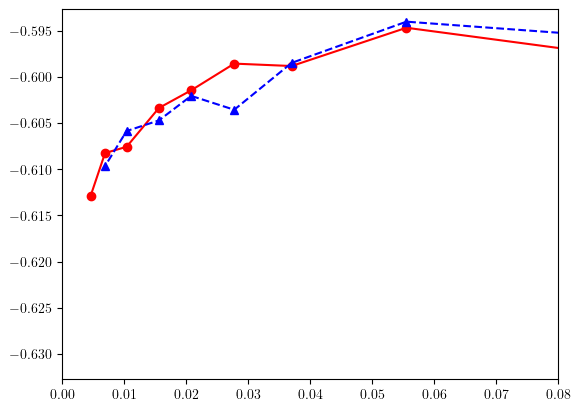

In [ ]:
fig, ax = plt.subplots(1, 1)

method = ['fftisdf-180-25']

for mi, mm in enumerate(method):
    m = method[0]
    d = data_nio_afm_kuhf_dmet[data_nio_afm_kuhf_dmet['method'] == mm]
    d.dropna(subset=['ene_dmet'], inplace=True)
    d.sort_values(by='nkpt', inplace=True)

    x0 = d['nkpt'].values
    y0 = d['ene_dmet'].values - d['ene_kuhf'].values

    colors[mi] = "red"
    ax.plot(1 / x0, y0, marker='o', linestyle='-', label=m, color=colors[mi])

    import numpy as np
    x = (1 / x0)[-3:]
    y = y0[-3:]

    r = np.polyfit(x, y, 1)
    p = np.poly1d(r)
    x = np.linspace(0, 0.06, 100)
    y = p(x)
    # ax.plot(x, y, marker='', linestyle='-', color=colors[mi], alpha=0.5)
    ax.set_ylim(r[1] - 0.02, r[1] + 0.02)

    out1 = {xx: yy for xx, yy in zip(x0, y0)}
    out1["TDL"] = r[1]
    # print("%20s, ene_kuhf = %f" % (mm, r[1]))

    colors[mi] = "blue"
    d = data_nio_fm_kuhf_dmet[data_nio_fm_kuhf_dmet['method'] == mm]
    d.dropna(subset=['ene_dmet'], inplace=True)
    d.sort_values(by='nkpt', inplace=True)

    x0 = d['nkpt'].values
    y0 = d['ene_dmet'].values - d['ene_kuhf'].values

    ax.plot(1 / x0, y0, marker='^', linestyle='--', label=m, color=colors[mi])

    import numpy as np
    x = (1 / x0)[-3:]
    y = y0[-3:]

    r = np.polyfit(x, y, 1)
    p = np.poly1d(r)
    x = np.linspace(0, 0.06, 100)
    y = p(x)
    # ax.plot(x, y, marker='', linestyle='-', color=colors[mi], alpha=0.5)
    ax.set_ylim(r[1] - 0.02, r[1] + 0.02)

    # print("%20s, ene_kuhf = %f" % (mm, r[1]))
    out2 = {xx: yy for xx, yy in zip(x0, y0)}
    out2["TDL"] = r[1]

    for k in x0:
        assert out1.get(k, None) is not None
        assert out2.get(k, None) is not None
        print("nk = %3d, ene_dmet_afm = %12.6f, ene_dmet_fm = %12.6f, gap = % 6.4e" % (k, out1[k], out2[k], out1[k] - out2[k]))
    print("%8s, ene_dmet_afm = %12.6f, ene_dmet_fm = %12.6f, gap = % 6.4e" % ("TDL", out1["TDL"], out2["TDL"], out1["TDL"] - out2["TDL"]))

ax.set_xlim(0, 0.08)

for ax in axs:
    ax.grid(
        linestyle='--',
        linewidth=0.5,
        alpha=0.5
    )



/var/folders/sm/7t_ndz1j5n5dlj8m6tnm2h480000gn/T/ipykernel_23915/3894950237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.sort_values(by='nkpt', inplace=True)


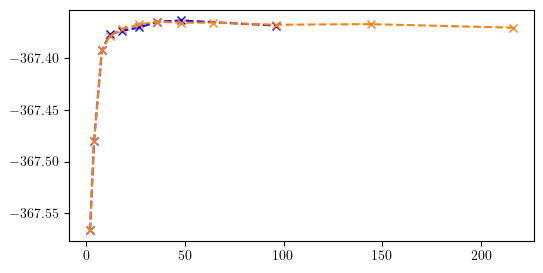

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

method = ['gdf-2.0', 'fftisdf-180-25']

for mi, mm in enumerate(method):
    m = method[0]
    d = data_nio_afm_kuhf_dmet[data_nio_afm_kuhf_dmet['method'] == mm]
    d.sort_values(by='nkpt', inplace=True)

    # get indices of the non-nan values
    non_nan_indices = ~np.isnan(d['ene_dmet'].values)
    x0 = d['nkpt'].values[non_nan_indices]
    y0 = d['ene_dmet'].values[non_nan_indices]

    ax.plot(x0, y0, marker='x', linestyle='--', label=m, color=colors[mi])

#     import numpy as np
#     x = x0[-3:]
#     y = y0[-3:]

#     r = np.polyfit(x, y, 1)
#     p = np.poly1d(r)
#     x = np.linspace(0, 0.06, 100)
#     y = p(x)
#     ax.plot(x, y, marker='', linestyle='-', color=colors[mi], alpha=0.5)
#     ax.set_ylim(r[1] - 0.05, r[1] + 0.05)

#     print("%20s, ene_kuhf = %f" % (mm, r[1]))

# ax.set_xlim(0, 0.06)